<a href="https://colab.research.google.com/github/Adrianodtss/Adrianodtss/blob/main/Trade_ISP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import yfinance as yf

pd.options.mode.chained_assignment = None

In [ ]:
ativo = "PETR4.SA"

In [ ]:
dados_ativo = yf.download(ativo)

dados_ativo.info()

[*********************100%%**********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6078 entries, 2000-01-03 to 2024-03-15
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       6078 non-null   float64
 1   High       6078 non-null   float64
 2   Low        6078 non-null   float64
 3   Close      6078 non-null   float64
 4   Adj Close  6078 non-null   float64
 5   Volume     6078 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 332.4 KB


<Axes: xlabel='Date'>

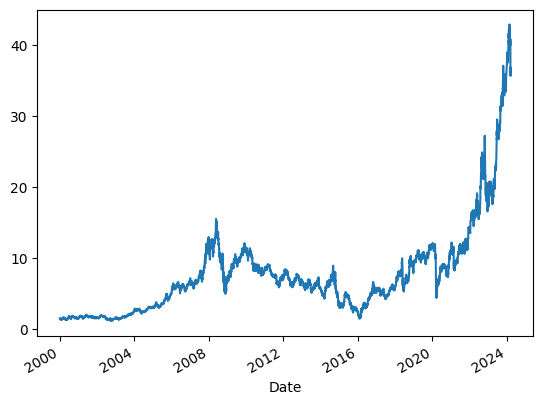

In [ ]:
dados_ativo['Adj Close'].plot()

#conferi o estado do grafico se não há discrepancias por possiveis ajustes de agrupamentos, dividendos ,etc

In [ ]:
dados_ativo['retornos'] = dados_ativo['Adj Close'].pct_change().dropna()

#aqui eu 1- criei a coluna retornos 2- peguei a coluna Adj close e fiz a variação % entre linhas com o pct_change 3- removi valores nulos q no caso é variações entre 2 dias iguais
dados_ativo.head()

,Open,High,Low,Close,Adj Close,Volume,retornos
Date,,,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.548670,35389440000,NaN
2000-01-04,5.550,5.550,5.550,5.550,1.462999,28861440000,-0.055319
2000-01-05,5.494,5.494,5.494,5.494,1.448238,43033600000,-0.010090
2000-01-06,5.475,5.475,5.475,5.475,1.443229,34055680000,-0.003459
2000-01-07,5.500,5.500,5.500,5.500,1.449819,20912640000,0.004566


In [ ]:
dados_ativo["retornos_Pos"] = dados_ativo["retornos"].apply(lambda x: x if x > 0 else  0)

dados_ativo["retornos_Neg"] = dados_ativo["retornos"].apply(lambda x: abs(x) if x < 0 else 0)

dados_ativo.head()

,Open,High,Low,Close,Adj Close,Volume,retornos,retornos_Pos,retornos_Neg
Date,,,,,,,,,
2000-01-03,5.875,5.875,5.875,5.875,1.548670,35389440000,NaN,0.000000,0.000000
2000-01-04,5.550,5.550,5.550,5.550,1.462999,28861440000,-0.055319,0.000000,0.055319
2000-01-05,5.494,5.494,5.494,5.494,1.448238,43033600000,-0.010090,0.000000,0.010090
2000-01-06,5.475,5.475,5.475,5.475,1.443229,34055680000,-0.003459,0.000000,0.003459
2000-01-07,5.500,5.500,5.500,5.500,1.449819,20912640000,0.004566,0.004566,0.000000


In [ ]:
dados_ativo["media_retorno_Pos"] = dados_ativo['retornos_Pos'].rolling(window=22).mean()
dados_ativo["media_retorno_Neg"] = dados_ativo['retornos_Neg'].rolling(window=22).mean()

#dados_ativo.loc[:,"media_teste_Pos"] =  dados_ativo['retornos_Pos'].rolling(window=22).mean()
#dados_ativo.loc[:,"media_teste_Neg"] =  dados_ativo['retornos_Neg'].rolling(window=22).mean()

dados_ativo = dados_ativo.dropna()

dados_ativo.head()

,Open,High,Low,Close,Adj Close,Volume,retornos,retornos_Pos,retornos_Neg,media_retorno_Pos,media_retorno_Neg
Date,,,,,,,,,,,
2000-02-01,5.200,5.200,5.200,5.200,1.370738,23672320000,0.019408,0.019408,0.0,0.003489,0.008878
2000-02-02,5.300,5.300,5.300,5.300,1.397099,14272000000,0.019231,0.019231,0.0,0.004363,0.008878
2000-02-03,5.450,5.450,5.450,5.450,1.436639,25950720000,0.028302,0.028302,0.0,0.005650,0.006364
2000-02-04,5.588,5.588,5.588,5.588,1.473016,21199360000,0.025321,0.025321,0.0,0.006800,0.005905
2000-02-07,5.625,5.625,5.625,5.625,1.482769,20613120000,0.006621,0.006621,0.0,0.007101,0.005748


In [ ]:
dados_ativo["RSI"] = (100 - 100/(1+ dados_ativo['media_retorno_Pos']/dados_ativo['media_retorno_Neg']))

dados_ativo.head()

,Open,High,Low,Close,Adj Close,Volume,retornos,retornos_Pos,retornos_Neg,media_retorno_Pos,media_retorno_Neg,RSI
Date,,,,,,,,,,,,
2000-02-01,5.200,5.200,5.200,5.200,1.370738,23672320000,0.019408,0.019408,0.0,0.003489,0.008878,28.211069
2000-02-02,5.300,5.300,5.300,5.300,1.397099,14272000000,0.019231,0.019231,0.0,0.004363,0.008878,32.950139
2000-02-03,5.450,5.450,5.450,5.450,1.436639,25950720000,0.028302,0.028302,0.0,0.005650,0.006364,47.026805
2000-02-04,5.588,5.588,5.588,5.588,1.473016,21199360000,0.025321,0.025321,0.0,0.006800,0.005905,53.522906
2000-02-07,5.625,5.625,5.625,5.625,1.482769,20613120000,0.006621,0.006621,0.0,0.007101,0.005748,55.266363


In [ ]:
dados_ativo.loc[dados_ativo['RSI'] > 30, 'Compra'] = "Sim"
dados_ativo.loc[dados_ativo['RSI'] < 30, 'Compra'] = "Não"

dados_ativo.head()

,Open,High,Low,Close,Adj Close,Volume,retornos,retornos_Pos,retornos_Neg,media_retorno_Pos,media_retorno_Neg,RSI,Compra
Date,,,,,,,,,,,,,
2000-02-01,5.200,5.200,5.200,5.200,1.370738,23672320000,0.019408,0.019408,0.0,0.003489,0.008878,28.211069,Não
2000-02-02,5.300,5.300,5.300,5.300,1.397099,14272000000,0.019231,0.019231,0.0,0.004363,0.008878,32.950139,Sim
2000-02-03,5.450,5.450,5.450,5.450,1.436639,25950720000,0.028302,0.028302,0.0,0.005650,0.006364,47.026805,Sim
2000-02-04,5.588,5.588,5.588,5.588,1.473016,21199360000,0.025321,0.025321,0.0,0.006800,0.005905,53.522906,Sim
2000-02-07,5.625,5.625,5.625,5.625,1.482769,20613120000,0.006621,0.006621,0.0,0.007101,0.005748,55.266363,Sim


In [ ]:
datas_compra = []
datas_venda = []

#for i in range(len(dados_ativo) -1):
for i in range(len(dados_ativo)):


  if "Sim" in dados_ativo['Compra'].iloc[i]:

    datas_compra.append(dados_ativo.iloc[i + 1].name)

    for j in range(1,11):

        if dados_ativo['RSI'].iloc[i + j] > 40:


            datas_venda.append(dados_ativo.iloc[i + j + 1].name)
            break

        elif j == 10 :

          datas_venda.append(dados_ativo.iloc[i + j + 1].name)

  datas_venda


IndexError: single positional indexer is out-of-bounds

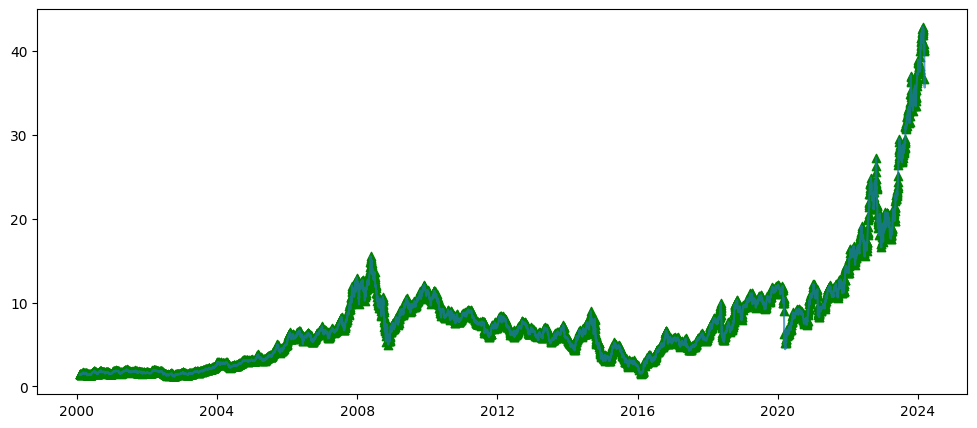

In [ ]:
#plt.figure(figsize = (12,5))
#plt.scatter(dados_ativo.loc[datas_compra].index, dados_ativo.loc[datas_compra]["Adj Close"], marker = 'A', c= 'g')
#plt.plot(dados_ativo['Adj Close'], alpha = 0.7)

plt.figure(figsize = (12, 5))
plt.scatter(dados_ativo.loc[datas_compra].index, dados_ativo.loc[datas_compra]['Adj Close'], marker = '^', c = 'g')
plt.plot(dados_ativo['Adj Close'], alpha = 0.7)


In [ ]:
#lucros = dados_ativo.loc[datas_venda]['Open'].values/dados_ativo.loc[datas_compra]['Open'].values - 1

lucros = dados_ativo.loc[datas_venda]['Open'].values/dados_ativo.loc[datas_compra]['Open'].values  - 1


lucros

ValueError: operands could not be broadcast together with shapes (5816,) (5817,) 

In [ ]:
operacoes_vencedoras= len(lucros[lucros>0])/len(lucros)

operacoes_vencedoras
